<a href="https://colab.research.google.com/github/Pranav-DarkMarge/Machine-Learning/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO



In [2]:
def load_data(url):
    response = requests.get(url)
    df = pd.read_csv(StringIO(response.text))
    return df

In [3]:

github_url = "https://raw.githubusercontent.com/Pranav-DarkMarge/Machine-Learning/refs/heads/main/hospital_readmissions.csv"
df = load_data(github_url)
display(df)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


<Axes: >

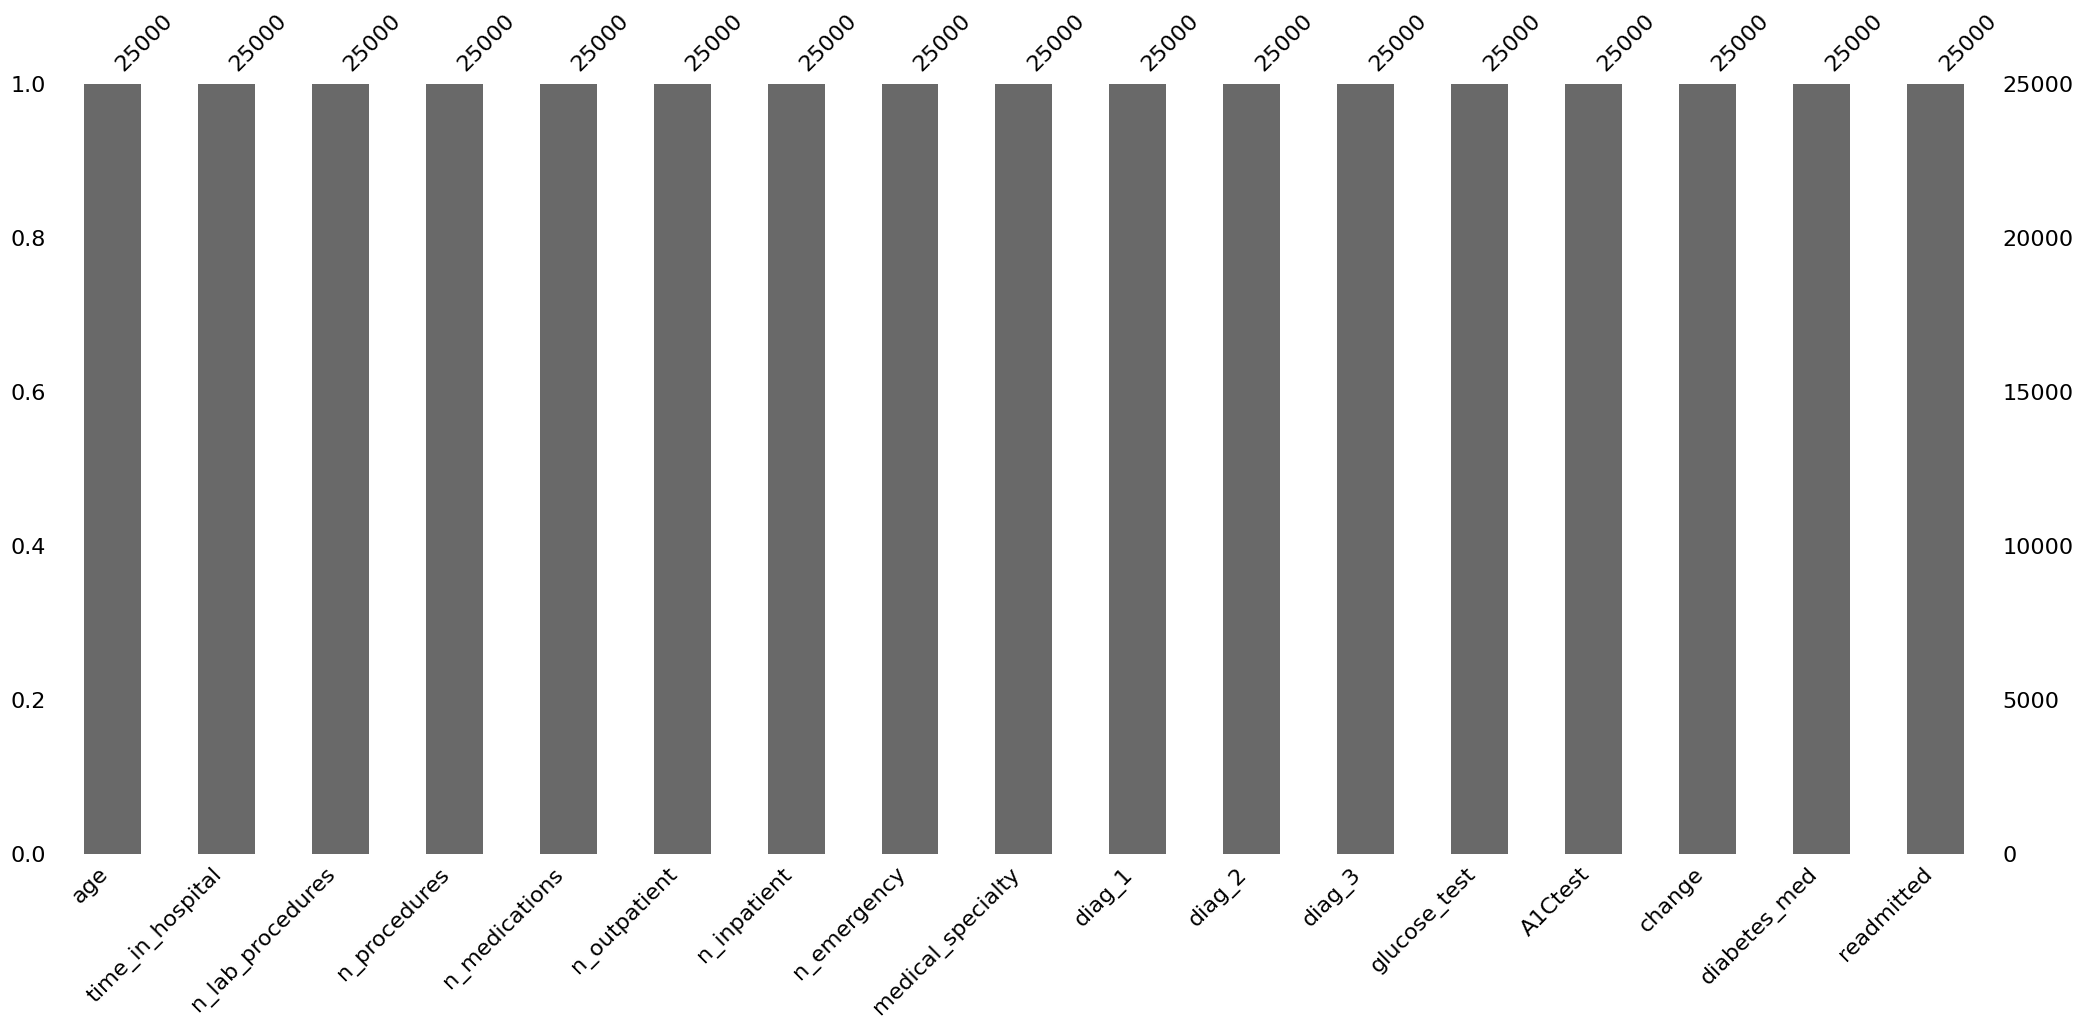

In [4]:

import missingno as msno

msno.bar(df)

In [5]:
num_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', \
                'n_outpatient', 'n_inpatient', 'n_emergency']
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


<Figure size 640x480 with 0 Axes>

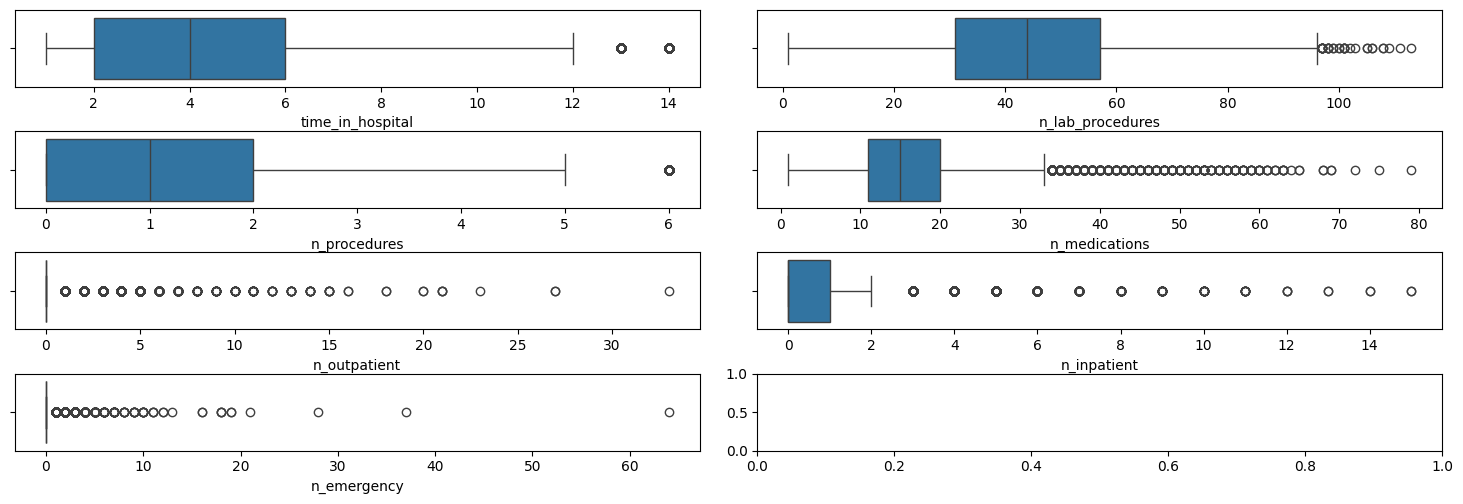

In [6]:
# plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.3, wspace = 0.7)
fig, axs = plt.subplots(4, 2, figsize=(15, 5))
fig.tight_layout()

# ax = plt.subplot(0, 0, 4)

# filter df and plot ticker on the new subplot axis
sns.boxplot(data = df, x = 'time_in_hospital', ax = axs[0, 0])
sns.boxplot(data = df, x = 'n_lab_procedures', ax = axs[0, 1])
sns.boxplot(data = df, x = 'n_procedures', ax = axs[1, 0])
sns.boxplot(data = df, x = 'n_medications', ax = axs[1, 1])
sns.boxplot(data = df, x = 'n_outpatient', ax = axs[2, 0])
sns.boxplot(data = df, x = 'n_inpatient', ax = axs[2, 1])
sns.boxplot(data = df, x = 'n_emergency', ax = axs[3, 0])

# fig.subplots_adjust(wspace=0.5)
plt.show()

<Axes: >

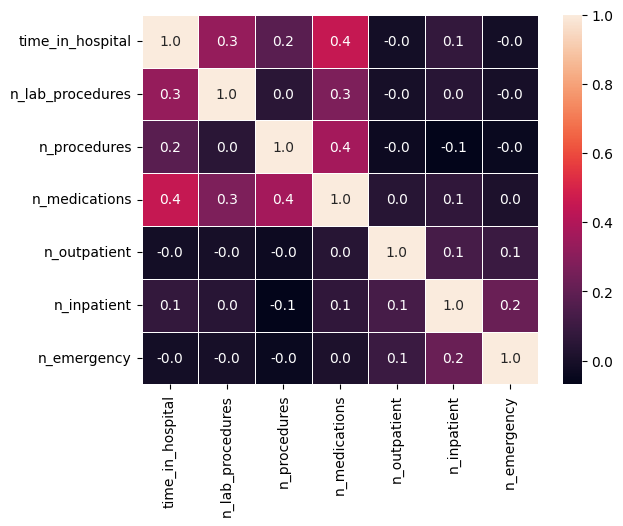

In [7]:
sns.heatmap(df[num_features].corr(), annot=True, linewidth=.5, fmt=".1f")


<Axes: xlabel='count', ylabel='readmitted'>

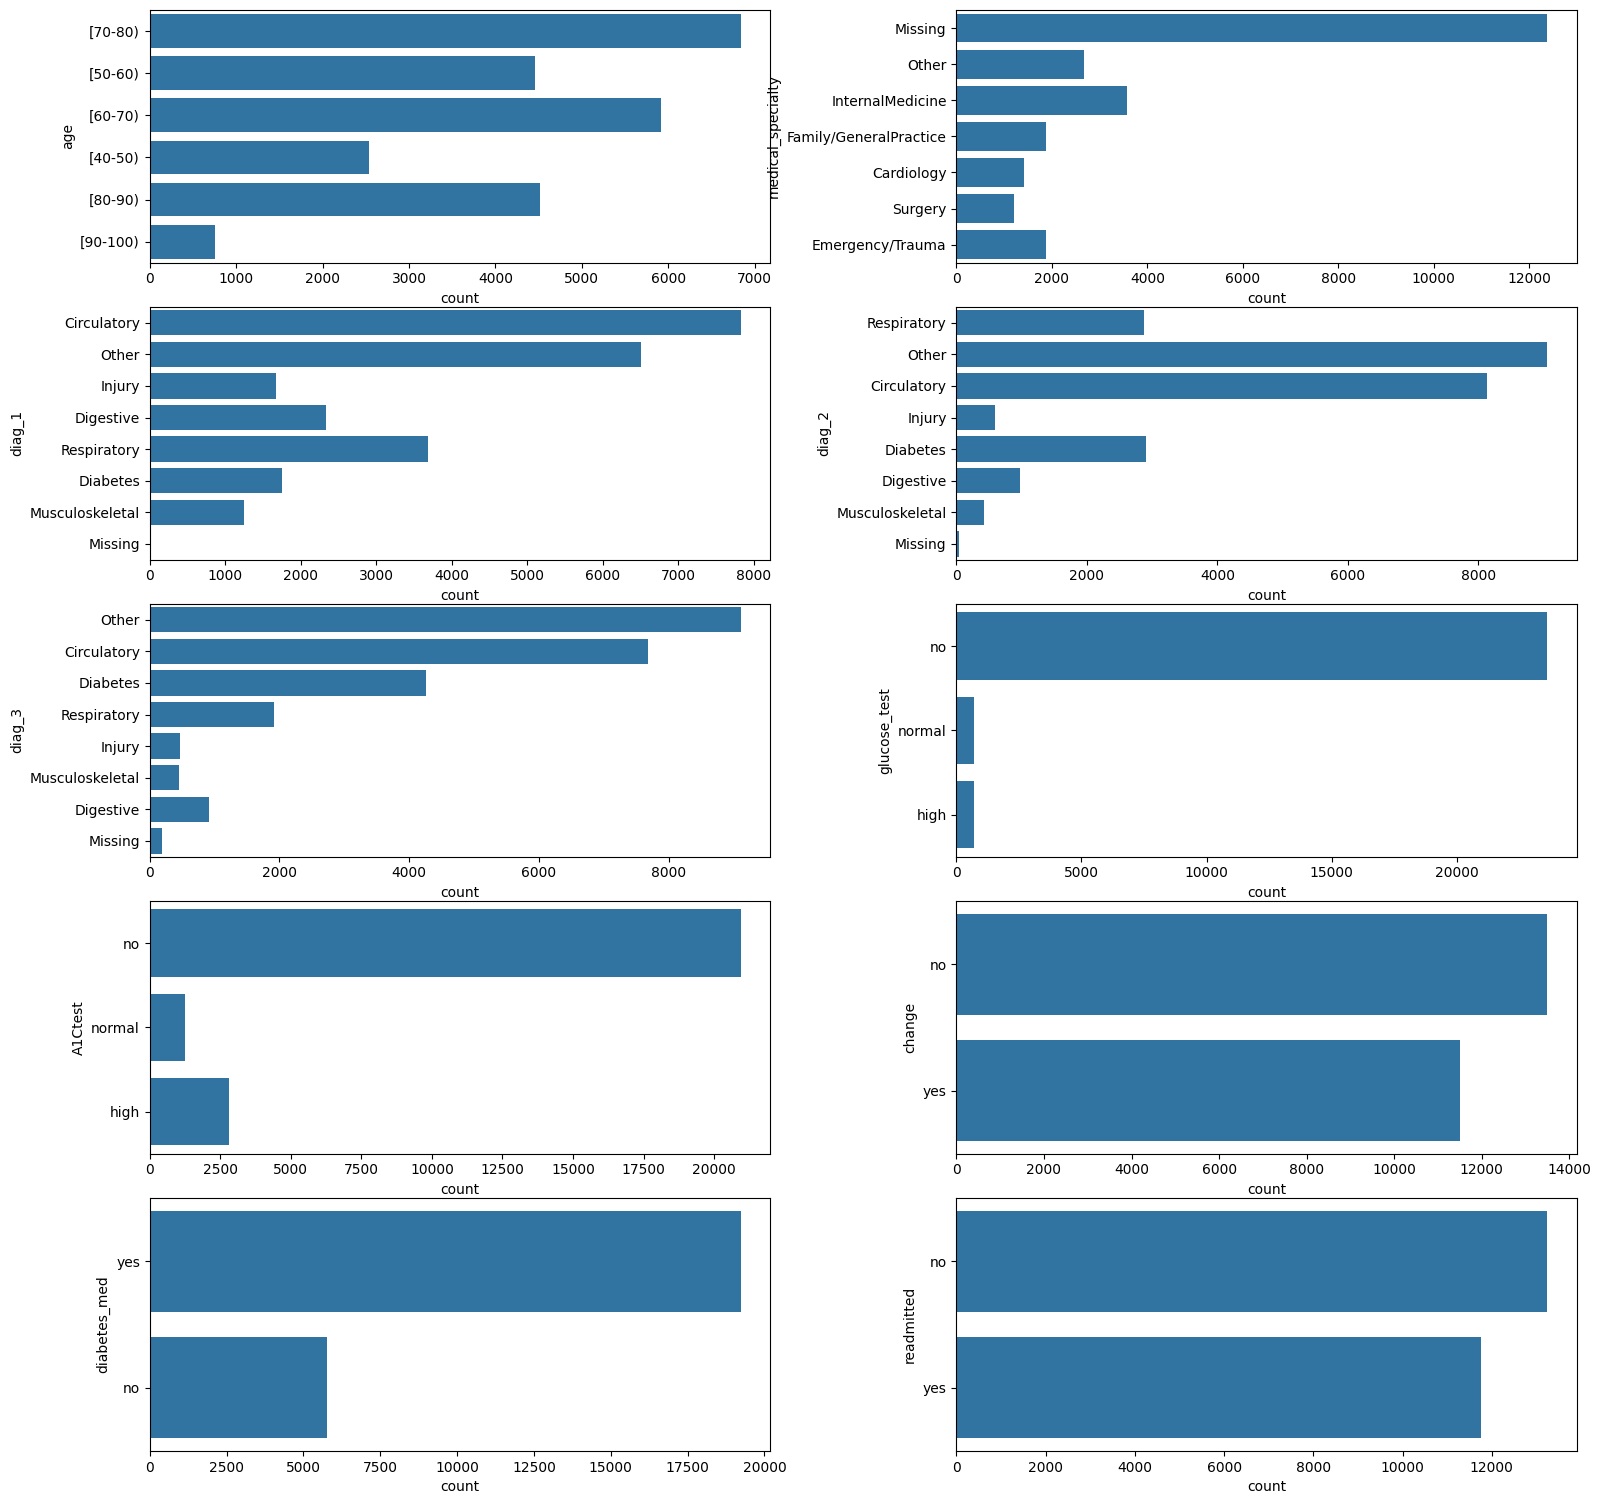

In [8]:
cat_features = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', \
                'A1Ctest', 'change', 'diabetes_med', 'readmitted']

fig, axs = plt.subplots(5, 2, figsize=(15, 15))
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

sns.countplot(data = df, y = 'age', ax = axs[0, 0])
sns.countplot(data = df, y = 'medical_specialty', ax = axs[0, 1])
# axs[0, 1].tick_params(rotation= 15)
sns.countplot(data = df, y = 'diag_1', ax = axs[1, 0])
sns.countplot(data = df, y = 'diag_2', ax = axs[1, 1])
sns.countplot(data = df, y = 'diag_3', ax = axs[2, 0])
sns.countplot(data = df, y = 'glucose_test', ax = axs[2, 1])
sns.countplot(data = df, y = 'A1Ctest', ax = axs[3, 0])
sns.countplot(data = df, y = 'change', ax = axs[3, 1])
sns.countplot(data = df, y = 'diabetes_med', ax = axs[4, 0])
sns.countplot(data = df, y = 'readmitted', ax = axs[4, 1])

# Change the numerical values to 0 and 1

In [9]:
df['change'] = df['change'].replace({'yes': 1, 'no': 0})
df['diabetes_med'] = df['diabetes_med'].replace({'yes': 1, 'no': 0})
df['readmitted'] = df['readmitted'].replace({'yes': 1, 'no': 0})
df

<ipython-input-9-001d31e59481>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace({'yes': 1, 'no': 0})
<ipython-input-9-001d31e59481>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetes_med'] = df['diabetes_med'].replace({'yes': 1, 'no': 0})
<ipython-input-9-001d31e59481>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,0,0,1
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,1,1,1
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,0,0,1
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,1,1,0


<Axes: >

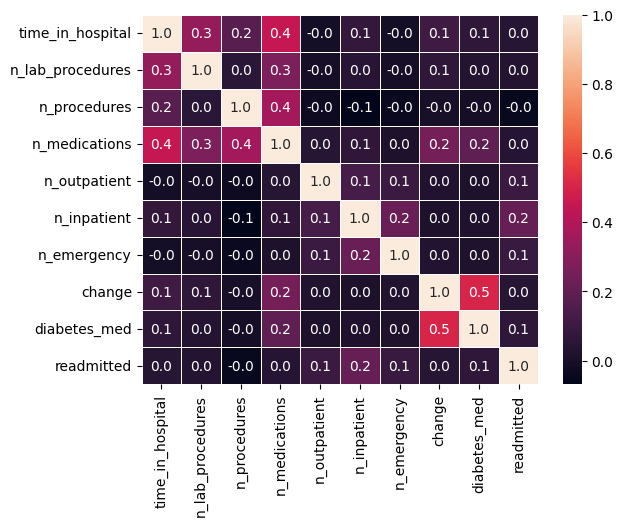

In [10]:
num_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', \
                'n_outpatient', 'n_inpatient', 'n_emergency']
num_target = num_features + ['change', 'diabetes_med', 'readmitted']
sns.heatmap(df[num_target].corr(), annot=True, linewidth=.5, fmt=".1f")

# Conversion of features into labels

In [11]:
from sklearn.preprocessing import LabelEncoder

le = dict()
data = pd.DataFrame()

for feat in ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test','A1Ctest']:
    le[feat] = LabelEncoder()
    data[feat] = le[feat].fit_transform(df[feat])

data

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest
0,3,4,0,7,6,1,1
1,3,5,6,6,6,1,1
2,1,4,0,0,0,1,1
3,3,4,0,6,1,1,1
4,2,3,6,0,7,1,1
...,...,...,...,...,...,...,...
24995,4,4,0,6,0,1,2
24996,4,4,2,3,6,1,0
24997,3,4,6,6,6,2,1
24998,3,2,7,1,6,1,1


In [12]:
for feat in num_target:
    data[feat] = df[feat]

data

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,change,diabetes_med,readmitted
0,3,4,0,7,6,1,1,8,72,1,18,2,0,0,0,1,0
1,3,5,6,6,6,1,1,3,34,2,13,0,0,0,0,1,0
2,1,4,0,0,0,1,1,5,45,0,18,0,0,0,1,1,1
3,3,4,0,6,1,1,1,2,36,0,12,1,0,0,1,1,1
4,2,3,6,0,7,1,1,1,42,0,7,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,4,0,6,0,1,2,14,77,1,30,0,0,0,0,0,1
24996,4,4,2,3,6,1,0,2,66,0,24,0,0,0,1,1,1
24997,3,4,6,6,6,2,1,5,12,0,6,0,1,0,0,0,1
24998,3,2,7,1,6,1,1,2,61,3,15,0,0,0,1,1,0


# Converted df into numerical features

In [13]:
data

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,change,diabetes_med,readmitted
0,3,4,0,7,6,1,1,8,72,1,18,2,0,0,0,1,0
1,3,5,6,6,6,1,1,3,34,2,13,0,0,0,0,1,0
2,1,4,0,0,0,1,1,5,45,0,18,0,0,0,1,1,1
3,3,4,0,6,1,1,1,2,36,0,12,1,0,0,1,1,1
4,2,3,6,0,7,1,1,1,42,0,7,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,4,0,6,0,1,2,14,77,1,30,0,0,0,0,0,1
24996,4,4,2,3,6,1,0,2,66,0,24,0,0,0,1,1,1
24997,3,4,6,6,6,2,1,5,12,0,6,0,1,0,0,0,1
24998,3,2,7,1,6,1,1,2,61,3,15,0,0,0,1,1,0


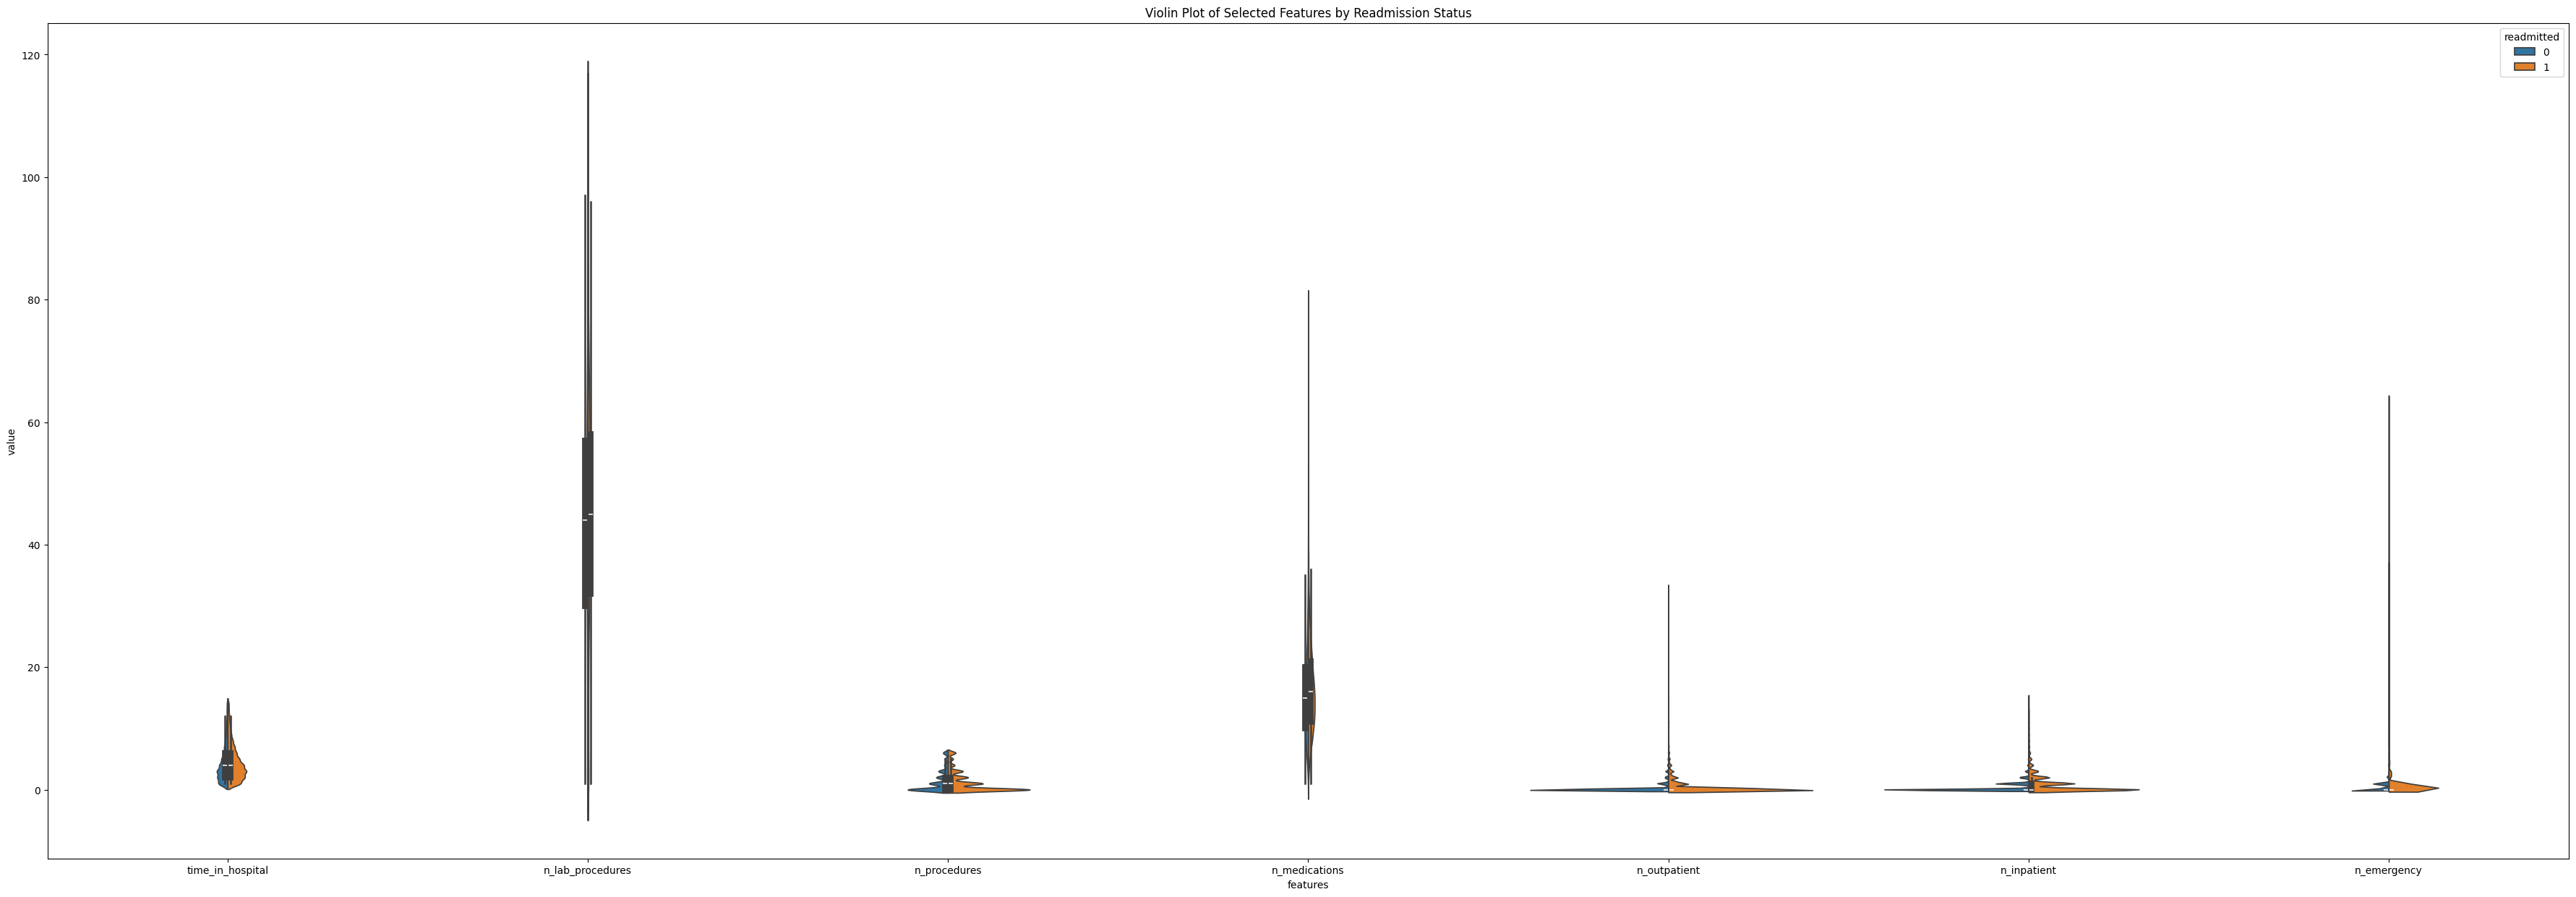

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_to_plot = pd.melt(data[num_features + ['readmitted']],
                       id_vars='readmitted',
                       var_name='features',
                       value_name='value')


data_to_plot['value'] = data_to_plot['value'].astype(float)


plt.figure(figsize=(45,15))
sns.violinplot(data=data_to_plot, x='features', y='value', hue='readmitted', split=True)
plt.title('Violin Plot of Selected Features by Readmission Status')
plt.show()


In [15]:
features = data.columns[:-1]
X = data[features]
y = data['readmitted']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16750, 16), (8250, 16), (16750,), (8250,))

# Using different scaling techniques and seeing how logistic regression performs

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

scalers = {
    'No Scaling': None,
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'RobustScaler': RobustScaler(),
}


results = {}

for scaler_name, scaler in scalers.items():
    if scaler:
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    model = LogisticRegression(max_iter=500, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results[scaler_name] = {'Accuracy': acc, 'Precision': precision, 'Recall': recall}

results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.columns = ['Scaler', 'Accuracy', 'Precision', 'Recall']
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)


           Scaler  Accuracy  Precision    Recall
4    RobustScaler  0.608121   0.623142  0.403276
0      No Scaling  0.607758   0.622687  0.402496
2  StandardScaler  0.607758   0.622588  0.402756
3    MaxAbsScaler  0.604606   0.618893  0.395216
1    MinMaxScaler  0.603758   0.617134  0.395216


# There is not much difference so any scaling technique can be used

[]

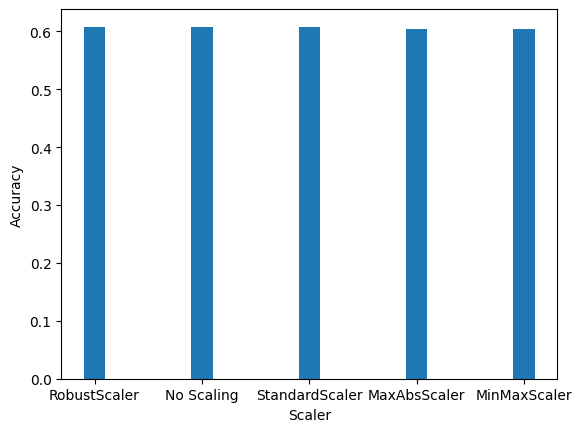

In [18]:
fig, ax = plt.subplots()

ax.bar(results_df['Scaler'],results_df['Accuracy'], width=0.2)
ax.set_xlabel('Scaler')
ax.set_ylabel('Accuracy')

plt.plot()

# Regularisation techniques

Convert the regression models into classifiers. This can be done by using LassoCV, RidgeCV, and ElasticNetCV (which are regularized regression models), but they would still output continuous predictions. To adapt these models for classification, you could threshold the predictions or round them to binary values (e.g., 0 or 1).

In [22]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'LassoCV': LassoCV(cv=5, random_state=42),
    'RidgeCV': RidgeCV(cv=5),
    'ElasticNetCV': ElasticNetCV(cv=5, random_state=42)
}

scaler = StandardScaler()

results = {}

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for model_name, model in models.items():
    try:
        model.fit(X_train_scaled, y_train)
        y_pred_continuous = model.predict(X_test_scaled)
        y_pred = (y_pred_continuous > 0.5).astype(int)

        acc = accuracy_score(y_test, y_pred)
        results[model_name] = acc

    except Exception as e:
        results[model_name] = f"Error: {e}"

results_df_reg = pd.DataFrame(list(results.items()), columns=['models', 'Accuracy'])
results_df_reg = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df_reg)


           Scaler  Accuracy  Precision    Recall
4    RobustScaler  0.608121   0.623142  0.403276
0      No Scaling  0.607758   0.622687  0.402496
2  StandardScaler  0.607758   0.622588  0.402756
3    MaxAbsScaler  0.604606   0.618893  0.395216
1    MinMaxScaler  0.603758   0.617134  0.395216


                    Model  Accuracy
2  Support Vector Machine  0.615636
5          Gradient Boost  0.613939
0     Logistic Regression  0.607758
1           Random Forest  0.604848
3             Naive Bayes  0.589818
4           Decision Tree  0.531879


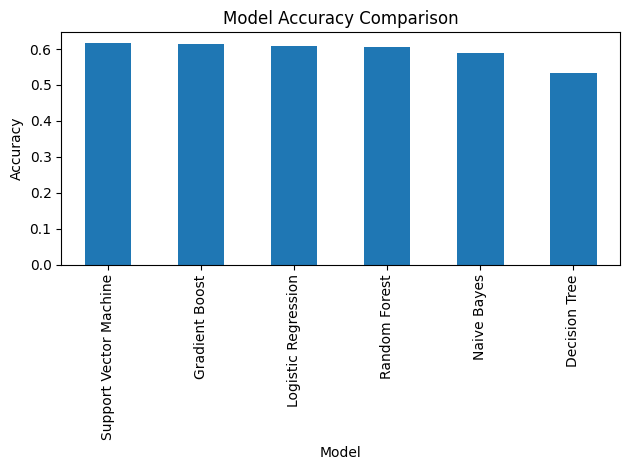

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Assume X_train, y_train, X_test, y_test are already defined

# Define the models to use
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boost': GradientBoostingClassifier(max_depth=5, random_state=42)
}

scaler = StandardScaler()

results = {}

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for model_name, model in models.items():
    try:
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)
        results[model_name] = acc

    except Exception as e:
        results[model_name] = f"Error: {e}"

results_df_models = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df_models = results_df_models.sort_values(by='Accuracy', ascending=False)
print(results_df_models)

fig, ax = plt.subplots()
plot_data = results_df_models.set_index('Model')['Accuracy'].sort_values(ascending=False)
plot_data.plot.bar(ax=ax)
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
fig.tight_layout()
plt.show()

# Using Feature selection technique called mutual information to improve the models

Feature Selection: 100%|██████████| 16/16 [00:53<00:00,  3.35s/it]

F1 Scores for different k values: [0.595, 0.594, 0.603, 0.595, 0.597, 0.605, 0.604, 0.605, 0.602, 0.603, 0.603, 0.607, 0.601, 0.605, 0.608, 0.609]


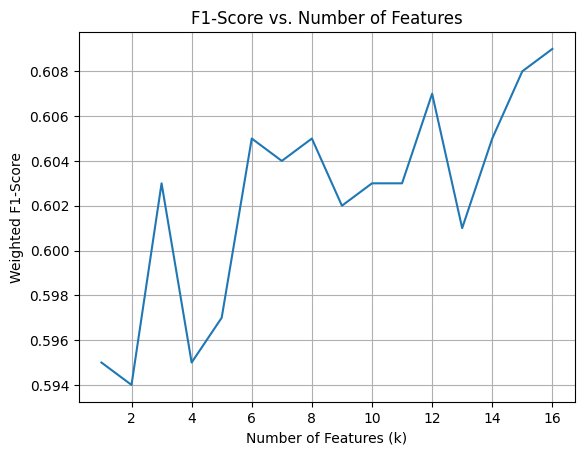

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from tqdm import tqdm
import numpy as np

gbc = GradientBoostingClassifier(max_depth=5, random_state=42)
f1_score_list = []
num_features = X_train.shape[1]

k_values = range(1, num_features + 1)

for k in tqdm(k_values, desc="Feature Selection"):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train, y_train)

    sel_X_train_v2 = selector.transform(X_train)
    sel_X_test_v2 = selector.transform(X_test)

    gbc.fit(sel_X_train_v2, y_train)
    kbest_preds = gbc.predict(sel_X_test_v2)

    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)

print("F1 Scores for different k values:", f1_score_list)

import matplotlib.pyplot as plt
plt.plot(k_values, f1_score_list)
plt.xlabel("Number of Features (k)")
plt.ylabel("Weighted F1-Score")
plt.title("F1-Score vs. Number of Features")
plt.grid(True)
plt.show()

# We see that there is not much variations to mutual information with k selected features

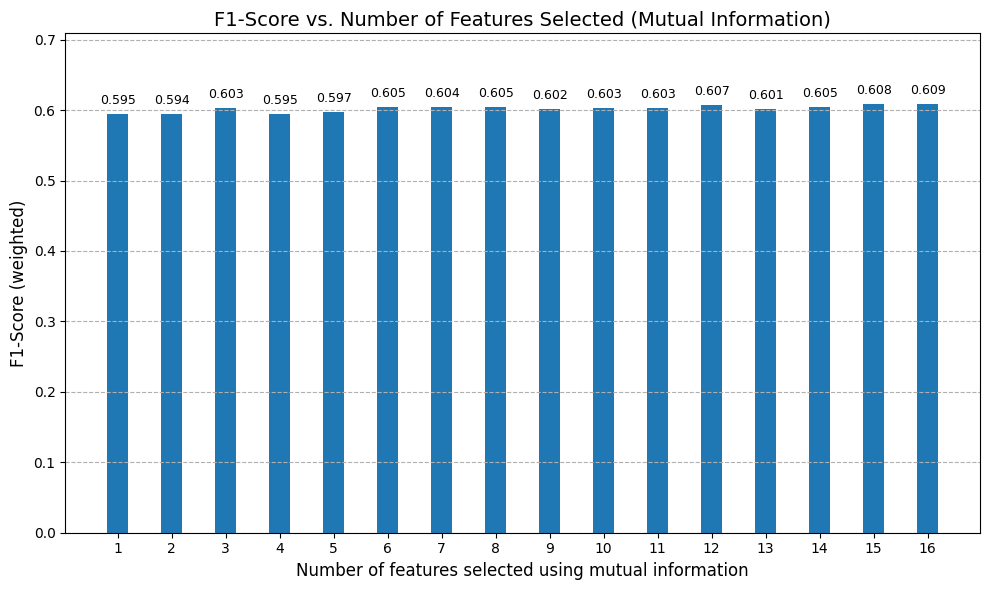

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))
num_features = len(X_train.columns)
x = np.arange(1, num_features + 1)
y = f1_score_list

bar_width = 0.4

bars = ax.bar(x, y, width=bar_width, label='F1-Score')
ax.set_xlabel('Number of features selected using mutual information', fontsize=12)
ax.set_ylabel('F1-Score (weighted)', fontsize=12)
ax.set_ylim(0, max(y) + 0.1)
ax.set_xticks(np.arange(1, num_features + 1))
ax.set_xticklabels(np.arange(1, num_features + 1), fontsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('F1-Score vs. Number of Features Selected (Mutual Information)', fontsize=14)
ax.grid(axis='y', linestyle='--')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
            f'{height:.3f}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

                    Model  Accuracy
2  Support Vector Machine  0.615636
5          Gradient Boost  0.613939
0     Logistic Regression  0.607758
1           Random Forest  0.604848
3             Naive Bayes  0.589818
4           Decision Tree  0.531879


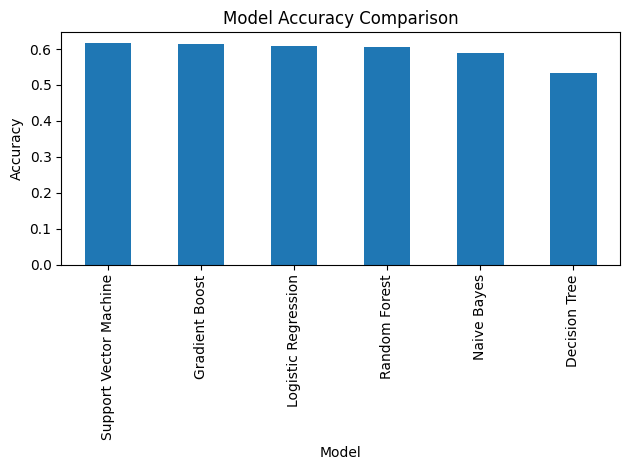

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt



# Define the models to use
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boost': GradientBoostingClassifier(max_depth=5, random_state=42)
}

scaler = StandardScaler()

results = {}

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for model_name, model in models.items():
    try:
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)
        results[model_name] = acc

    except Exception as e:
        results[model_name] = f"Error: {e}"

results_df_models = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df_models = results_df_models.sort_values(by='Accuracy', ascending=False)
print(results_df_models)

fig, ax = plt.subplots()
plot_data = results_df_models.set_index('Model')['Accuracy'].sort_values(ascending=False)
plot_data.plot.bar(ax=ax)
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
fig.tight_layout()
plt.show()